In [52]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import sobel_h,sobel_v,gaussian
from skimage.transform import hough_line, hough_line_peaks

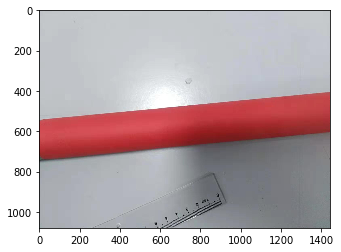

In [53]:
img_raw = plt.imread("data/3.jpg")
plt.imshow(img_raw)

c:\users\keli\onedrive\develop\_libs\pyenvs\sci\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  """Entry point for launching an IPython kernel.


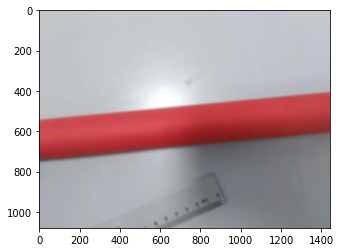

In [54]:
img_blur = gaussian(img_raw,5)
plt.imshow(img_blur)

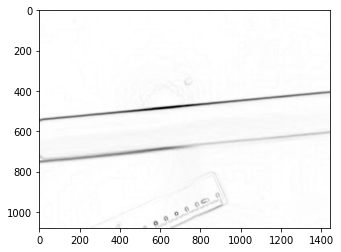

In [55]:
def sobel(img):
    components = []
    for c in range(np.shape(img)[-1]):
        components.append(sobel_h(img[:,:,c]))
        components.append(sobel_v(img[:,:,c]))
    components = np.array(components)
    edge = np.sqrt(np.sum(np.square(components),0))
    return edge

edges = sobel(img_blur)
plt.imshow(edges,cmap='Greys')

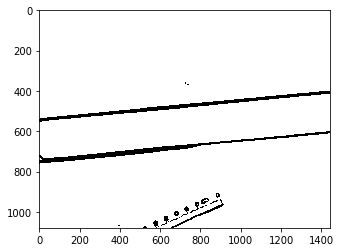

In [56]:
# 不知为何，不二值化的话效果会很糟糕
edges = edges>0.03
plt.imshow(edges,cmap='Greys')

Wall time: 215 ms


Text(0, 0.5, 'Distance (pixels)')

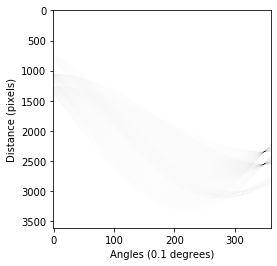

In [57]:
%%time

tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360)
hough, theta, d = hough_line(edges, theta=tested_angles)

plt.imshow(hough, cmap='Greys',aspect=1/10)
plt.xlabel('Angles (0.1 degrees)')
plt.ylabel('Distance (pixels)')

(1080, 0)

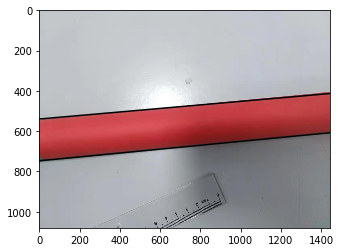

In [58]:
plt.imshow(img_raw)

origin = np.array((0, edges.shape[1]))
for _, angle, dist in zip(*hough_line_peaks(gaussian(hough,1), theta, d)):
    y0, y1 = (dist - origin * np.cos(angle)) / np.sin(angle)
    plt.plot(origin, (y0, y1), color='black')
plt.xlim(origin)
plt.ylim((edges.shape[0], 0))

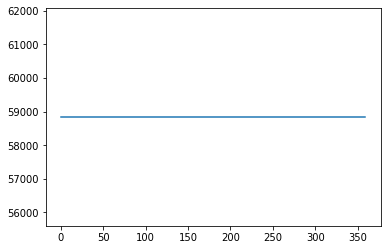

In [59]:
# 发现他们的和是相同的
plt.plot(np.sum(hough,0))

c:\users\keli\onedrive\develop\_libs\pyenvs\sci\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log2
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\keli\onedrive\develop\_libs\pyenvs\sci\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


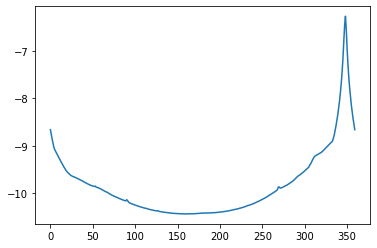

In [60]:
# 只好通过信息熵来计算“分散度”
prob = np.array(hough,np.float) / np.sum(hough,0,keepdims=True)
entropy = prob*np.log2(prob)
np.putmask(entropy,hough==0,0.0)
plt.plot(np.sum(entropy,0))

# todo 可以根据左边那个大峰判断平行线的倾斜角度